In [1]:
!pip install prophet

In [1]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)
goog = df[df['Name'] == 'GOOG'][['Close']].copy()

In [3]:
goog.columns = ['y']
goog['ds'] = goog.index

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnae2jt2t/62wyomme.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnae2jt2t/gua3q0bf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24539', 'data', 'file=/tmp/tmpnae2jt2t/62wyomme.json', 'init=/tmp/tmpnae2jt2t/gua3q0bf.json', 'output', 'file=/tmp/tmpnae2jt2t/prophet_model21cxs69_/prophet_model-20230918120108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:01:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:01:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


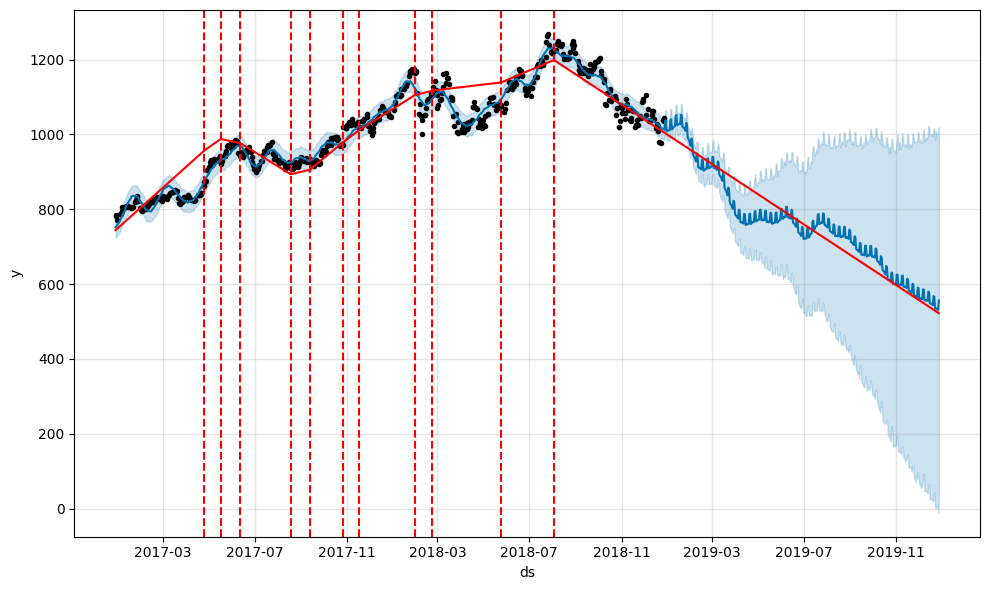

In [4]:
m = Prophet()
m.fit(goog.iloc[-252*2:])
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)
#Prophet is capable to producing only linear and logistic trends

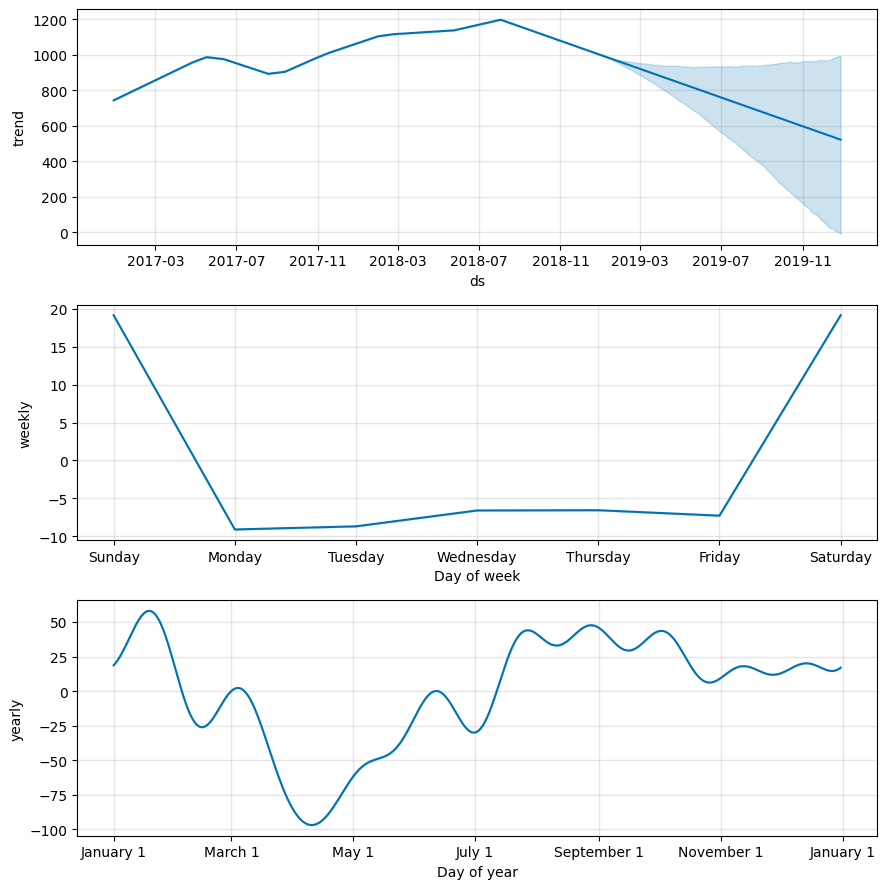

In [5]:
m.plot_components(forecast);
#There shouldnt be a weekly component

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnae2jt2t/vv6ejseg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnae2jt2t/oq89mzi1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13388', 'data', 'file=/tmp/tmpnae2jt2t/vv6ejseg.json', 'init=/tmp/tmpnae2jt2t/oq89mzi1.json', 'output', 'file=/tmp/tmpnae2jt2t/prophet_modelquryxxia/prophet_model-20230918120842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:08:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:08:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


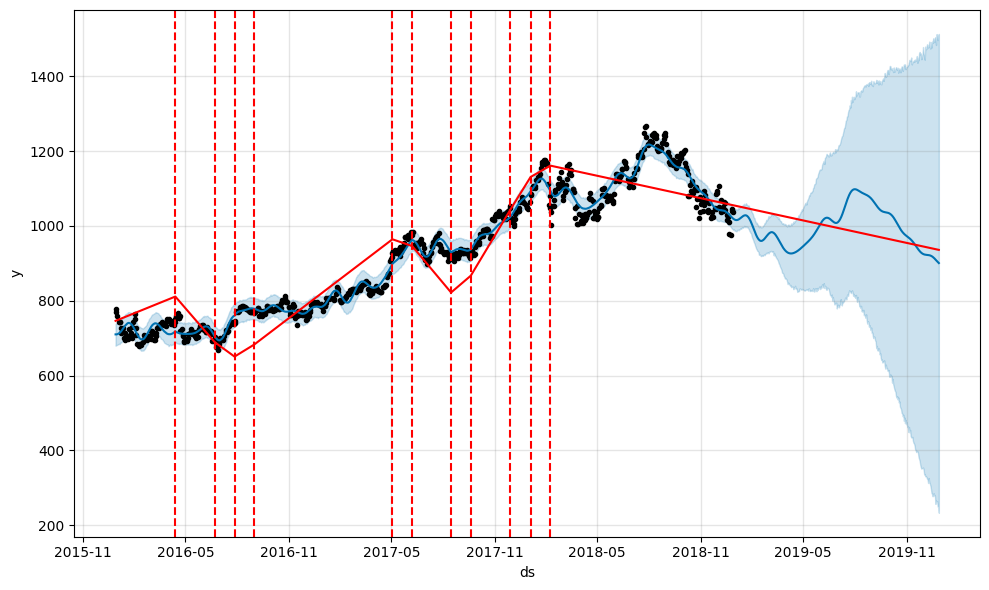

In [6]:
m = Prophet(weekly_seasonality=False)
m.fit(goog.iloc[-252*3:])
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

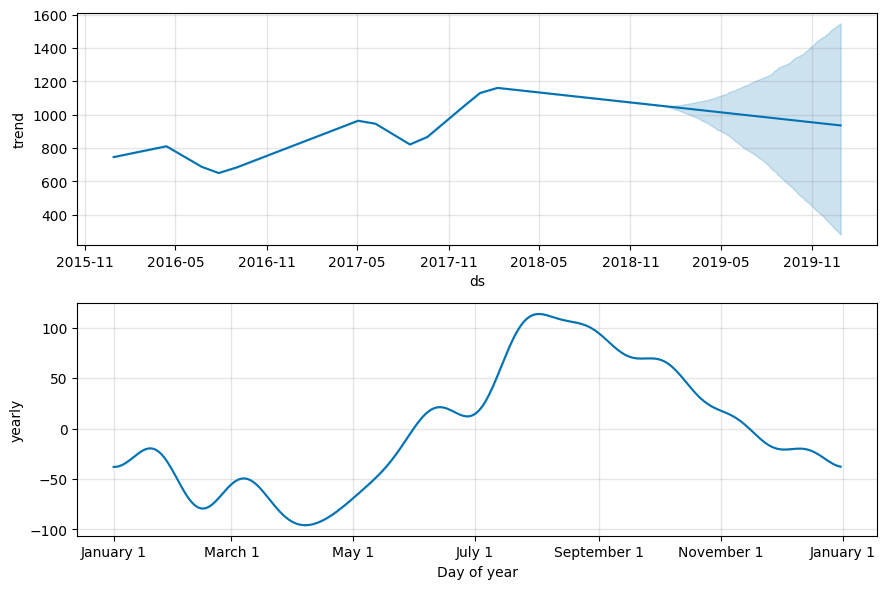

In [7]:
m.plot_components(forecast);

### CROSS VALIDATION WITH NAIVE FORECAST

In [8]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [10]:
m = Prophet(weekly_seasonality=False)
m.fit(goog[-252*2:])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnae2jt2t/4y2oehuw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnae2jt2t/crl9jq0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41249', 'data', 'file=/tmp/tmpnae2jt2t/4y2oehuw.json', 'init=/tmp/tmpnae2jt2t/crl9jq0l.json', 'output', 'file=/tmp/tmpnae2jt2t/prophet_modelpgfa18e1/prophet_model-20230918120941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:09:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:09:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
df_cv = cross_validation(
    m,
    initial='365 days',
    period='15 days',
    horizon='30 days')

INFO:prophet:Making 23 forecasts with cutoffs between 2018-01-02 00:00:00 and 2018-11-28 00:00:00


  0%|          | 0/23 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpnae2jt2t/1pmvfrc1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnae2jt2t/q9r11emy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56884', 'data', 'file=/tmp/tmpnae2jt2t/1pmvfrc1.json', 'init=/tmp/tmpnae2jt2t/q9r11emy.json', 'output', 'file=/tmp/tmpnae2jt2t/prophet_modelg1x64arn/prophet_model-20230918121028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:10:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:10:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnae2jt2t/6o8pqs9h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnae2jt2t/vy75lm09.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [12]:
naive = df_cv[['ds', 'yhat', 'y', 'cutoff']].copy()

In [14]:
#We dont have cutoff days for all trades, so we take last prices
naive_storage = np.zeros(naive.shape[0])
one_day = pd.Timedelta(1, 'day')
for i, row in naive.iterrows():
  cutoff = row['cutoff']
  # print(cutoff)

  # must find last cutoff that actually exists in df
  while cutoff not in goog.index:
    cutoff = cutoff - one_day

  naive_storage[i] = goog.loc[cutoff]['y']

naive['yhat'] = naive_storage

In [15]:
pm = performance_metrics(df_cv)
pm['smape'].mean()

0.05803616994736194

In [16]:
naive_metrics = performance_metrics(naive)
naive_metrics['smape'].mean()
#Our Model cant beat the naive forecast

0.04089977942710926

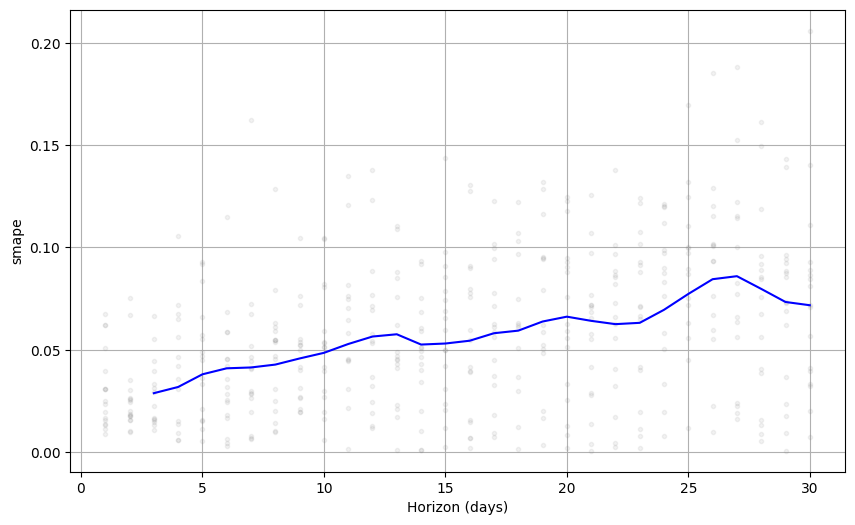

In [17]:
plot_cross_validation_metric(df_cv, metric='smape');

### Cross-Validation with Logged Data

In [18]:
log_goog = goog.copy()
log_goog['y'] = np.log(goog['y'])

In [19]:
m = Prophet(weekly_seasonality=False)
m.fit(log_goog[-252*2:])
df_cv = cross_validation(
    m,
    initial='365 days',
    period='15 days',
    horizon='30 days')
pm = performance_metrics(df_cv)
pm['smape'].mean()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnae2jt2t/3v25e4up.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnae2jt2t/3xdnqywy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15677', 'data', 'file=/tmp/tmpnae2jt2t/3v25e4up.json', 'init=/tmp/tmpnae2jt2t/3xdnqywy.json', 'output', 'file=/tmp/tmpnae2jt2t/prophet_modelpaxsknod/prophet_model-20230918121513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:15:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:15:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 23 forecasts with cutoffs between 2018-01-02 00:00:00 and 2018-11-28 00:00:00


  0%|          | 0/23 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpnae2jt2t/3s7f4_09.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnae2jt2t/p4lefjne.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26646', 'data', 'file=/tmp/tmpnae2jt2t/3s7f4_09.json', 'init=/tmp/tmpnae2jt2t/p4lefjne.json', 'output', 'file=/tmp/tmpnae2jt2t/prophet_modelv06q55cg/prophet_model-20230918121514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:15:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:15:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnae2jt2t/27h38pfb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnae2jt2t/zpq0_h8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

0.007941404865420503

In [20]:
naive = df_cv[['ds', 'yhat', 'y', 'cutoff']].copy()
naive_storage = np.zeros(naive.shape[0])
for i, row in naive.iterrows():
  cutoff = row['cutoff']
  while cutoff not in goog.index:
    cutoff = cutoff - pd.Timedelta(1, 'day')

  naive_storage[i] = log_goog.loc[cutoff]['y']

naive['yhat'] = naive_storage
naive_metrics = performance_metrics(naive)
naive_metrics['smape'].mean()

0.005834369694368293

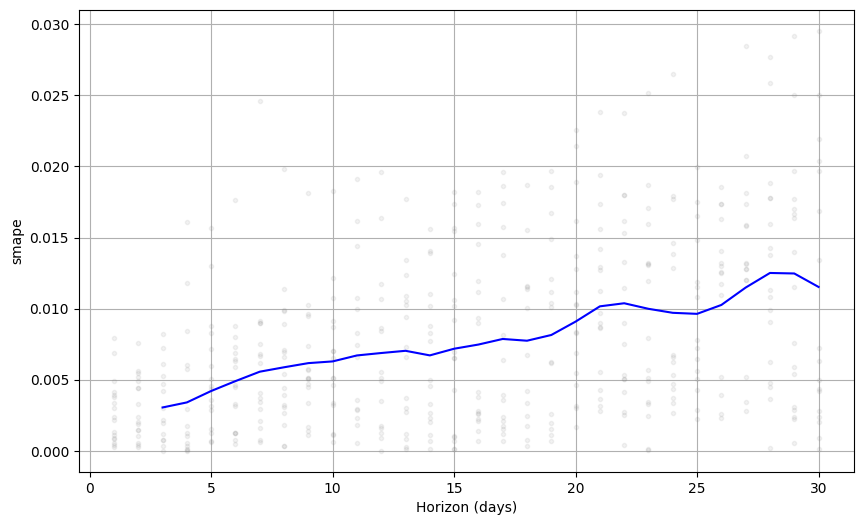

In [21]:
#Naive forecast wins again means that Prophet is not a good choice for predicting stock prices.
plot_cross_validation_metric(df_cv, metric='smape');